# Web Scraping of UN Countries Data

## Project Overview

This projects aims at showcasing my skills in **Python** and **web scraping** by collecting country data from infoboxes on Wikipedia.\
The focus here is on demonstrating the technical process of data extraction and preparation, the exact accuracy or utility of the data itself is not critical.

Using **scraping libraries**, this script extracts **public information** that could be used for an econometric study.

The result will be a dataframe where individuals are **UN member countries**, and the variables are:\
    **Qualitative**\
    _ Capital city\
    _ Currency\
    _ Official Language\
    **Quantitative**\
    _ Population\
    _ GDP\
    _ Human Development Index


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

import re # used to remove footnote indicators
from countryinfo import CountryInfo # used to get countries common names

# used to charge the code after modifying CountryScraping.py
%load_ext autoreload
%autoreload 2
import CountryScraping

## Data Collection (Wikipedia Scraping)

### Extracting the list of UN member countries 

In [2]:
url = "https://en.wikipedia.org/wiki/Member_states_of_the_United_Nations"
wiki_list_member = pd.read_html(url)
member_states = wiki_list_member[0]
member_states = member_states['Member state']

### Cleaning the list of UN member countries

In [3]:
# Remove footnote indicators

def clean_text(text):
    if isinstance(text, str):  # Si la valeur est une chaîne de caractères
        return re.sub(r'\[.*?\]', '', text)  # Enlever les indices entre crochets
    return text

member_states = member_states.map(clean_text)

# Change official names to Common names (Wikipedia pages use common name)

def common_country_name(country_name):
    country = CountryInfo(country_name)
    return country.name()

member_states = member_states.map(common_country_name)
member_states = member_states.str.capitalize() # first letter of countries as capital
member_states = member_states.str.replace(' ', '_') # Viet nam as Viet_nam for URL

### Extracting the variables

In [4]:
df = pd.DataFrame(np.nan, index=range(len(member_states)), columns=range(6))
df.columns = ['Capital', 'Currency', 'Language', 'Population', 'GDP', 'HDI']

# Considering qualitative variables as objects (instead of float64)
df['Capital'] = df['Capital'].astype('object')
df['Currency'] = df['Currency'].astype('object')
df['Language'] = df['Language'].astype('object')

nb_errors = 0 # the scrapping didn't work for some countries (I plan to fix it later)

for i in range(len(df)):
    try:
        country_name = member_states[i]
        infobox = CountryScraping.get_infobox(country_name)
        df.loc[i,'Capital'] = CountryScraping.get_capital(infobox)
        df.loc[i,'Currency'] = CountryScraping.get_currency(infobox)
        df.loc[i,'Language'] = CountryScraping.get_language(infobox)
        df.loc[i,'Population'] = CountryScraping.get_population(infobox)
        df.loc[i,'GDP'] = CountryScraping.get_GDP(infobox)
        df.loc[i,'HDI'] = CountryScraping.get_HDI(infobox)
    except:
        df.loc[i] = np.nan #countries for which there was an error
        nb_errors = nb_errors+1

df.index = member_states

countries_data = df.dropna(axis=0, how='all') #remove countries for which data wasn't collected
#renaming the processed df for understanding of the data

print(f"Number of missing countries: {nb_errors} over {len(member_states)}.")
print(f"It represents: {nb_errors/193*100:.3f}% of UN countries")
print(countries_data)

Number of missing countries: 12 over 193.
It represents: 6.218% of UN countries
                       Capital Currency  \
Member state                              
Afghanistan              Kabul      AFN   
Albania                 Tirana      ALL   
Algeria                Algiers      DZD   
Andorra       Andorra la Vella      EUR   
Angola                  Luanda      AOA   
...                        ...      ...   
Venezuela              Caracas      NaN   
Viet_nam                 Hanoi      VND   
Yemen                    Sanaa      YER   
Zambia                  Lusaka      ZMW   
Zimbabwe                Harare      NaN   

                                                       Language   Population  \
Member state                                                                   
Afghanistan                                         Pashto/Dari   41128771.0   
Albania                                                Albanian    2402113.0   
Algeria                                 

## Result DataFrame

In [5]:
#Results obtained from the scraping
countries_data

,Capital,Currency,Language,Population,GDP,HDI
Member state,,,,,,
Afghanistan,Kabul,AFN,Pashto/Dari,41128771.0,8.100700e+10,0.462
Albania,Tirana,ALL,Albanian,2402113.0,5.819600e+10,0.789
Algeria,Algiers,DZD,Arabic/Berber,46700000.0,7.685200e+11,0.745
Andorra,Andorra la Vella,EUR,Catalan,85863.0,6.001000e+09,0.884
Angola,Luanda,AOA,Portuguese,37290193.0,3.749400e+11,0.591
...,...,...,...,...,...,...
Venezuela,Caracas,NaN,Spanish,30518260.0,2.119260e+11,0.699
Viet_nam,Hanoi,VND,Vietnamese,100300000.0,1.559000e+12,0.726
Yemen,Sanaa,YER,Arabic,34449825.0,6.996300e+10,0.424


In [6]:
#Saving datas as a CSV file:
countries_data.to_csv("UN_members_data_November_2024", index=False)

## Quick example of data manipulation

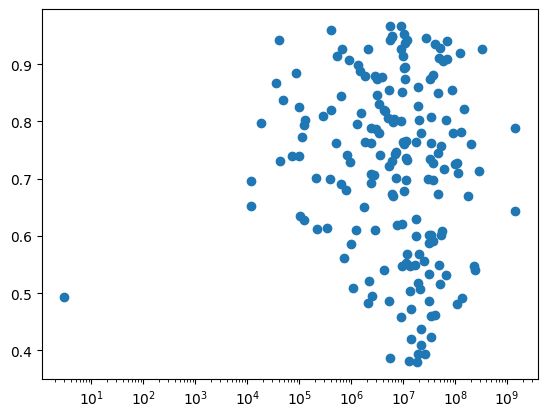

In [7]:
# Visual example of what we can use the data for

import matplotlib.pyplot as plt
plt.scatter(countries_data["Population"],countries_data["HDI"])
plt.xscale('log')

# From this plot, we can make the hypothesis of an absence of correlation between the size of the population and HDI for UN member countries.